# 1 - Perkenalan

Nama : Danu 

Batch : FTDS-016-RMT

Objective : Memprediksi passenger yang Survive atau Not Survive

# 2 - Import Libraries

In [48]:
# Import Libraries

import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 3 - Data Loading

In [49]:
# Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 4 - Data Preprocessing

## Get Data for Model Inference

In [50]:
# Get Data for Model Inference

data_inf = data.sample(5, random_state=28)
data_inf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [51]:
# Remove Inference Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
1,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
2,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
3,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
4,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


## Splitting between `X` and `y`

In [53]:
# Splitting between `X` and `y`

X = data_train_test.drop('Survived', axis=1)
y = data_train_test['Survived']

In [54]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=28)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (640, 11)
Val Size :  (113, 11)
Test Size :  (133, 11)


## Handling Missing Values

In [55]:
# Check Missing Values on X_train

X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            126
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          496
Embarked         1
dtype: int64

In [56]:
# Check Missing Values on X_val

X_val.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            26
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          86
Embarked        0
dtype: int64

In [57]:
# Check Missing Values on X_test

X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             25
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          102
Embarked         1
dtype: int64

## Feature Selection

In [58]:
# Display X_train

X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
786,792,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
189,191,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
567,572,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
500,505,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
868,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
163,165,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
522,527,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
566,571,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S


Misalkan column `PassengerId`, `Cabin`, `Ticket`, `Embarked`, dan `Name` tidak memiliki korelasi yang kuat terhadap column `Survived`.

In [59]:
# Drop Columns

X_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_val.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)

## Get Numerical Columns and Categorical Columns

In [60]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns :  ['Sex']


## Pipeline

In [61]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [62]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(640, 7)

# 5 - Sequential API

## 5.1 - Model Definition

In [63]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model_sequential = Sequential()
model_sequential.add(Dense(16, activation='relu', input_shape=(7,))) # Hidden Layer 1
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                128       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


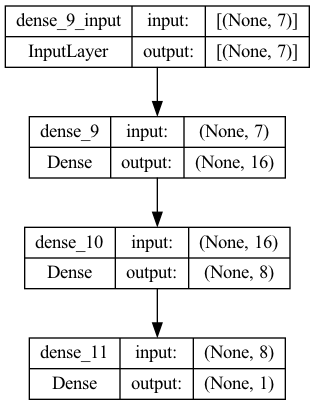

In [64]:
# Plot Layers

import tensorflow as tf

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 5.2 - Model Training

In [65]:
# Train the Model

history_seq = model_sequential.fit(X_train, 
                                   y_train, 
                                   epochs=20, 
                                   validation_data=(X_val, y_val), 
                                   batch_size=10)

Epoch 1/20
 8/64 [==>...........................] - ETA: 0s - loss: 0.5921 - accuracy: 0.6375 

2022-12-01 10:08:52.228439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


64/64 [==============================] - 1s 9ms/step - loss: 0.5942 - accuracy: 0.6281 - val_loss: 0.5931 - val_accuracy: 0.6106
Epoch 2/20
10/64 [===>..........................] - ETA: 0s - loss: 0.5721 - accuracy: 0.6200

2022-12-01 10:08:52.818294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


64/64 [==============================] - 0s 7ms/step - loss: 0.5615 - accuracy: 0.6625 - val_loss: 0.5831 - val_accuracy: 0.6637
Epoch 3/20
64/64 [==============================] - 0s 8ms/step - loss: 0.5356 - accuracy: 0.7094 - val_loss: 0.5768 - val_accuracy: 0.7345
Epoch 4/20
64/64 [==============================] - 0s 7ms/step - loss: 0.5086 - accuracy: 0.7891 - val_loss: 0.5657 - val_accuracy: 0.7168
Epoch 5/20
64/64 [==============================] - 0s 7ms/step - loss: 0.4836 - accuracy: 0.8109 - val_loss: 0.5560 - val_accuracy: 0.7168
Epoch 6/20
64/64 [==============================] - 1s 9ms/step - loss: 0.4667 - accuracy: 0.8172 - val_loss: 0.5577 - val_accuracy: 0.7345
Epoch 7/20
64/64 [==============================] - 1s 14ms/step - loss: 0.4546 - accuracy: 0.8188 - val_loss: 0.5538 - val_accuracy: 0.7345
Epoch 8/20
64/64 [==============================] - 1s 16ms/step - loss: 0.4445 - accuracy: 0.8234 - val_loss: 0.5451 - val_accuracy: 0.7080
Epoch 9/20
64/64 [===========

## 5.3 - Model Evaluation

In [66]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.594208,0.628125,0.593103,0.610619
1,0.561475,0.662500,0.583116,0.663717
2,0.535618,0.709375,0.576778,0.734513
3,0.508595,0.789062,0.565712,0.716814
4,0.483646,0.810938,0.556044,0.716814
5,0.466745,0.817187,0.557656,0.734513
6,0.454644,0.818750,0.553849,0.734513
7,0.444481,0.823438,0.545096,0.707965
8,0.436140,0.823438,0.544725,0.716814
9,0.431030,0.826563,0.541394,0.716814


<AxesSubplot: >

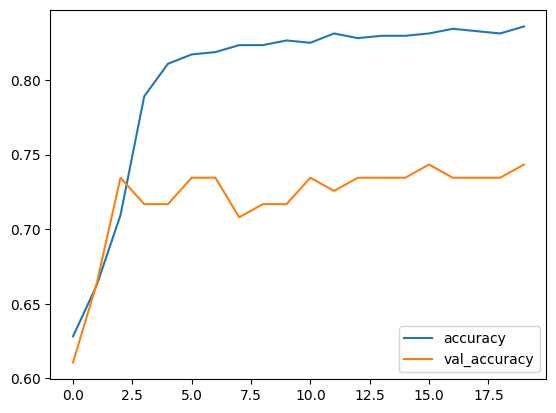

In [67]:
# Plot between accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

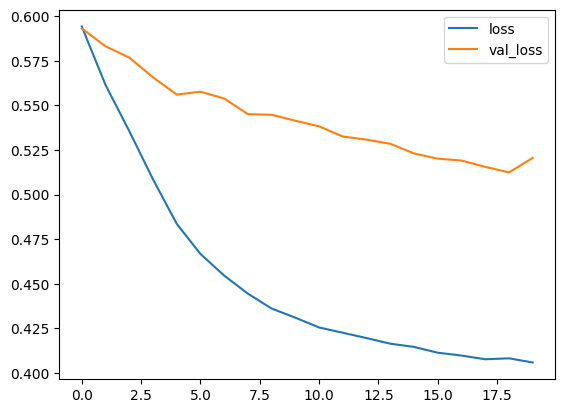

In [68]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [69]:
# Model Evaluation

from sklearn.metrics import classification_report 

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

5/5 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        84
           1       0.75      0.80      0.77        49

    accuracy                           0.83       133
   macro avg       0.81      0.82      0.82       133
weighted avg       0.83      0.83      0.83       133



2022-12-01 10:09:03.798665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# 6 - Functional API

## 6.1 - Model Definition

In [70]:
# Create Functional Model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(7,))
hidden1_layer = Dense(16, activation='relu')(input_layer)
hidden2_layer = Dense(8, activation='relu')(hidden1_layer)

concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 16)           128         ['input_2[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 8)            136         ['dense_12[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 15)           0           ['input_2[0][0]',                
                                                                  'dense_13[0][0]']         

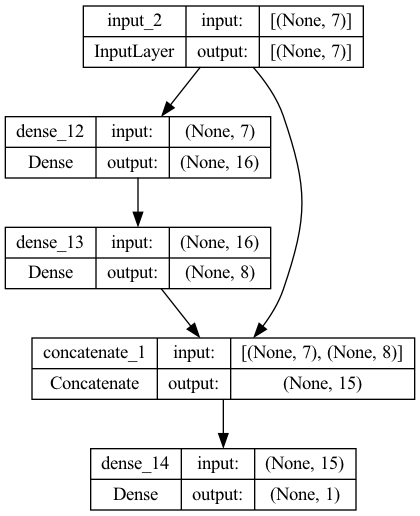

In [71]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.2 - Model Training

In [72]:
# Train the Model

history_func = model_functional.fit(X_train, 
                                   y_train, 
                                   epochs=20, 
                                   validation_data=(X_val, y_val), 
                                   batch_size=10)

Epoch 1/20


2022-12-01 10:09:04.515176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


64/64 [==============================] - 1s 10ms/step - loss: 0.8424 - accuracy: 0.3203 - val_loss: 0.7819 - val_accuracy: 0.3451
Epoch 2/20
 1/64 [..............................] - ETA: 0s - loss: 0.7789 - accuracy: 0.4000

2022-12-01 10:09:05.254811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


64/64 [==============================] - 0s 7ms/step - loss: 0.6987 - accuracy: 0.5000 - val_loss: 0.6613 - val_accuracy: 0.6726
Epoch 3/20
64/64 [==============================] - 1s 8ms/step - loss: 0.5824 - accuracy: 0.7359 - val_loss: 0.5762 - val_accuracy: 0.7611
Epoch 4/20
64/64 [==============================] - 0s 7ms/step - loss: 0.5085 - accuracy: 0.8031 - val_loss: 0.5435 - val_accuracy: 0.7345
Epoch 5/20
64/64 [==============================] - 0s 8ms/step - loss: 0.4693 - accuracy: 0.8125 - val_loss: 0.5296 - val_accuracy: 0.7345
Epoch 6/20
64/64 [==============================] - 0s 7ms/step - loss: 0.4477 - accuracy: 0.8141 - val_loss: 0.5249 - val_accuracy: 0.7257
Epoch 7/20
64/64 [==============================] - 0s 7ms/step - loss: 0.4329 - accuracy: 0.8156 - val_loss: 0.5252 - val_accuracy: 0.7168
Epoch 8/20
64/64 [==============================] - 0s 7ms/step - loss: 0.4241 - accuracy: 0.8203 - val_loss: 0.5184 - val_accuracy: 0.7168
Epoch 9/20
64/64 [=============

## 6.3 - Model Evaluation

In [73]:
# Create DataFrame

history_functional_df = pd.DataFrame(history_func.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,0.842392,0.320312,0.781918,0.345133
1,0.698668,0.500000,0.661345,0.672566
2,0.582384,0.735938,0.576247,0.761062
3,0.508476,0.803125,0.543458,0.734513
4,0.469298,0.812500,0.529555,0.734513
5,0.447722,0.814063,0.524911,0.725664
6,0.432876,0.815625,0.525168,0.716814
7,0.424140,0.820312,0.518359,0.716814
8,0.417579,0.825000,0.513045,0.716814
9,0.415234,0.823438,0.515050,0.716814


<AxesSubplot: >

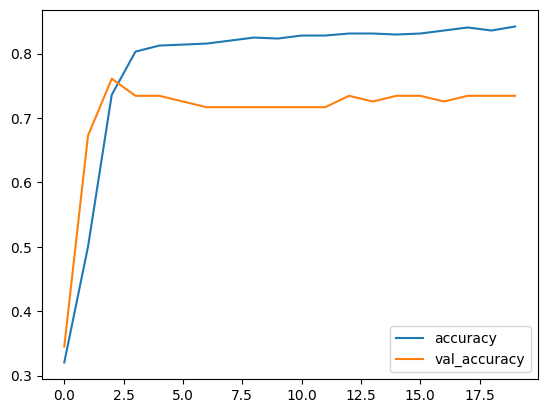

In [74]:
# Plot between accuracy and val_accuracy

history_functional_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

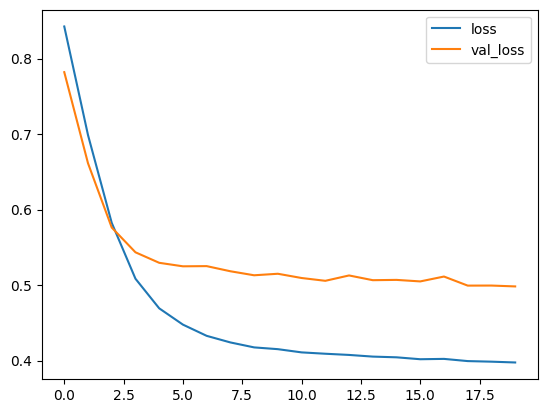

In [75]:
# Plot between loss and val_loss

history_functional_df[['loss', 'val_loss']].plot()

In [76]:
# Model Evaluation

from sklearn.metrics import classification_report 

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

5/5 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        84
           1       0.79      0.78      0.78        49

    accuracy                           0.84       133
   macro avg       0.83      0.83      0.83       133
weighted avg       0.84      0.84      0.84       133



2022-12-01 10:09:14.513548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# 7 - Model Saving

In [77]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [78]:
# Summary of Model Sequential

model_sequential.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                128       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Freeze Model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                128       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 0
Non-trainable params: 273
_________________________________________________________________


In [80]:
# Save ANN Model

model_sequential.save('titanic_model.h5')

# 8 - Model Inference

In [81]:
# Load The Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann = load_model('titanic_model.h5')

In [88]:
data_inf.values.shape

(5, 12)

In [82]:
# Transform Inference-Set 

data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

array([[ 0.85858734, -0.59345635, -0.48794103, -0.49246397, -0.4728609 ,
         0.        ,  1.        ],
       [-1.54620871,  0.88962837,  0.44984353, -0.49246397,  0.35585768,
         0.        ,  1.        ],
       [ 0.85858734, -0.59345635, -0.48794103, -0.49246397, -0.47471659,
         0.        ,  1.        ],
       [-1.54620871,  0.51885719, -0.48794103,  0.72443541, -0.06824395,
         0.        ,  1.        ],
       [-1.54620871,  1.5570165 , -0.48794103,  0.72443541,  0.51962175,
         0.        ,  1.        ]])

In [83]:
# Predict using Neural Network

y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 55ms/step


2022-12-01 10:09:15.013005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0],
       [0],
       [0],
       [0],
       [0]])